# Sentiment Analysis of Taylor Swift Lyrics
Analyzing the sentiment of Taylor Swift lyrics by album.
[Source](https://github.com/shaynak/taylor-swift-lyrics/blob/main/songs.csv)

## 1. Library Imports

In [4]:
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Data Loading and Understanding

In [5]:
# Load song data
songs = pd.read_csv("data/songs.csv")

In [6]:
songs.head()
songs

,Title,Album,Lyrics
0,22 (Taylor’s Version),Red (Taylor’s Version),It feels like a perfect night\nTo dress up lik...
1,All Too Well (10 Minute Version) (Taylor’s Ver...,Red (Taylor’s Version),"I walked through the door with you, the air wa..."
2,All Too Well (Taylor’s Version),Red (Taylor’s Version),"I walked through the door with you, the air wa..."
3,Babe (Taylor’s Version) [From The Vault],Red (Taylor’s Version),"What about your promises, promises?\nWhat abou..."
4,Begin Again (Taylor’s Version),Red (Taylor’s Version),Took a deep breath in the mirror\nHe didn't li...
...,...,...,...
219,Safe & Sound (Taylor’s Version),The Hunger Games,I remember tears streaming down your face when...
220,Beautiful Ghosts,Cats: Highlights From the Motion Picture Sound...,Follow me home if you dare to\nI wouldn't know...
221,Macavity,Cats: Highlights From the Motion Picture Sound...,"Macavity's a mystery cat, he's called the Hidd..."
222,Christmas Tree Farm,Christmas Tree Farm,My winter nights are taken up by static\nStres...


In [7]:
# TODO: How many albums are currently in this dataset
# songs.columns
albums = songs["Album"]
# albums.unique()
albums = albums.drop_duplicates()
print(len(albums))
print(albums)
albums.value_counts()


31
0                                 Red (Taylor’s Version)
29                                                 Lover
47                                The More Lover Chapter
48           1989 (Taylor’s Version) [Tangerine Edition]
70                               Midnights (3am Edition)
90      Taylor Swift (Big Machine Radio Release Special)
99                          Speak Now (Taylor’s Version)
121                     1989 (Taylor’s Version) [Deluxe]
122                          Fearless (Taylor’s Version)
147                                           reputation
161             The Taylor Swift Holiday Collection - EP
166                                    2004–2005 Demo CD
171                                     The Hunger Games
172            Women in Music Pt. III (Expanded Edition)
173            Two Lanes of Freedom (Accelerated Deluxe)
174                         Midnights (Target Exclusive)
175    Fifty Shades Darker (Original Motion Picture S...
176         The More Fearles

Album
Red (Taylor’s Version)                                                   1
Fifty Shades Darker (Original Motion Picture Soundtrack)                 1
Christmas Tree Farm                                                      1
Cats: Highlights From the Motion Picture Soundtrack                      1
Carolina (From The Motion Picture “Where The Crawdads Sing”) - Single    1
How Long Do You Think It’s Gonna Last?                                   1
folklore (deluxe version)                                                1
evermore (Japanese Edition)                                              1
Hannah Montana: The Movie                                                1
evermore                                                                 1
folklore                                                                 1
Midnights (The Late Night Edition)                                       1
Love Drunk                                                               1
Taylor Swift (Best 

## 3. EDA and Data Cleaning

In [8]:
# TODO: Map the albums to only what's in the album list
# The album should say "Other" if it's not in the list

album_list = ["Red", "Lover", "1989", "Midnights", "Speak Now", "Fearless", "reputation", "folklore", "evermore", "Taylor Swift"]
# for album in album_list:
#     if album in album_list:
#         songs["Album"] = album
#     else:
#         songs["Album"] = "Other"
for i in range(len(songs["Album"])):
    in_list = False
    for album in album_list:
        if album in songs["Album"][i]:
            in_list = True
            songs["Album"][i] = album
            
    if in_list == False:
        songs["Album"][i] = "Other"

               

songs["Album"].value_counts()

/var/folders/z9/gzbgl18s2wgcr125qq0q2h280000gn/T/ipykernel_12601/845977067.py:15: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  songs["Album"][i] = album
/var/folders/z9/gzbgl18s2wgcr125qq0q2h280000gn/T/ipykernel_12601/845977067.py:18: Futur

Album
Red             29
Fearless        26
1989            23
Midnights       22
Speak Now       22
Lover           19
Other           18
folklore        17
evermore        17
Taylor Swift    16
reputation      15
Name: count, dtype: int64

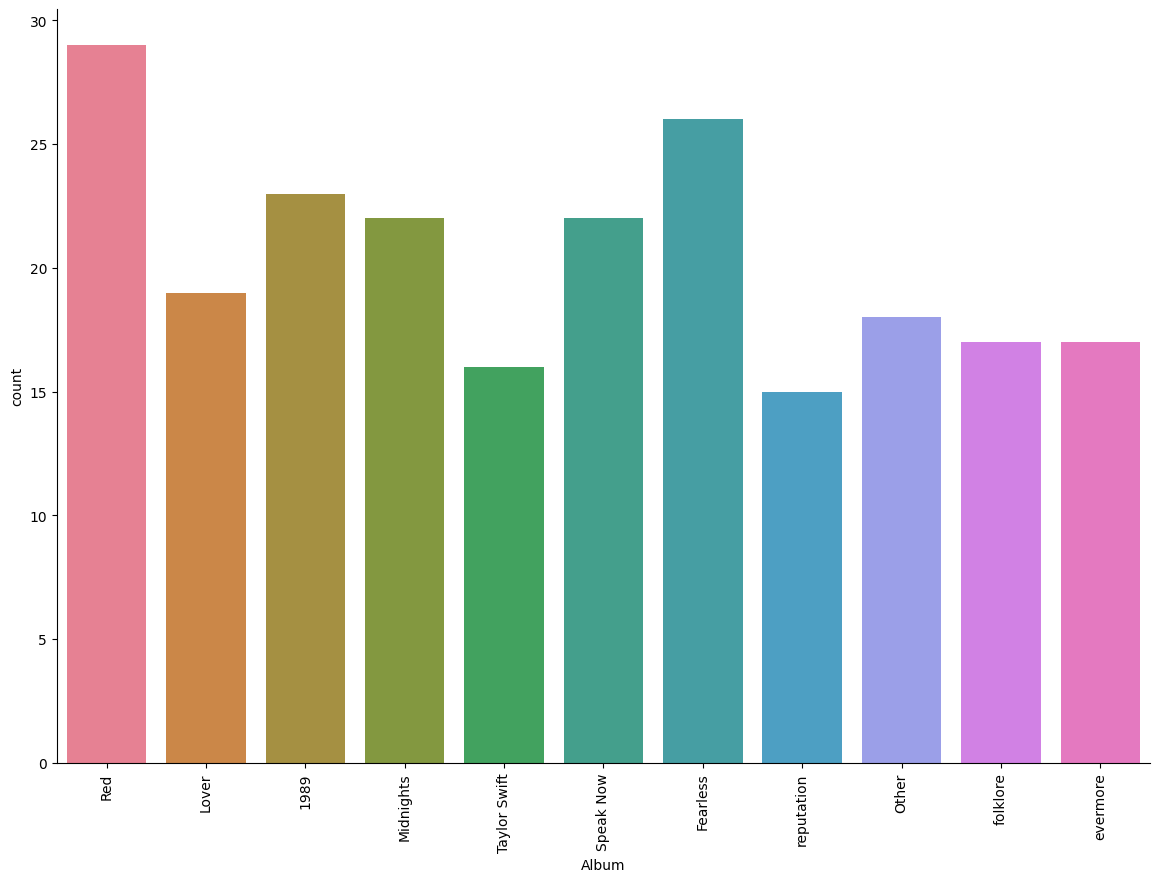

In [9]:
ax = sns.catplot(data=songs, x='Album', kind="count", hue='Album', height=8.27, aspect=11.7/8.27)
plt.xticks(rotation='vertical')
plt.show()

## 4. Sentiment Analysis of all the lyrics

In [10]:
# TODO: Identify the sentiments of the lyrics of each song
# Sentiment Analysis
sia = SentimentIntensityAnalyzer()


# Return the sentiment score of each review
def get_polarity_scores(review):
    scores = sia.polarity_scores(review)
    return scores["neg"], scores["pos"], scores["neu"], scores["compound"]

# Apply polarity scoring function and save scores into separate columns
songs[['Negative', 'Positive', 'Neutral', 'Compound']] = songs['Lyrics'].apply(lambda x: pd.Series(get_polarity_scores(x)))


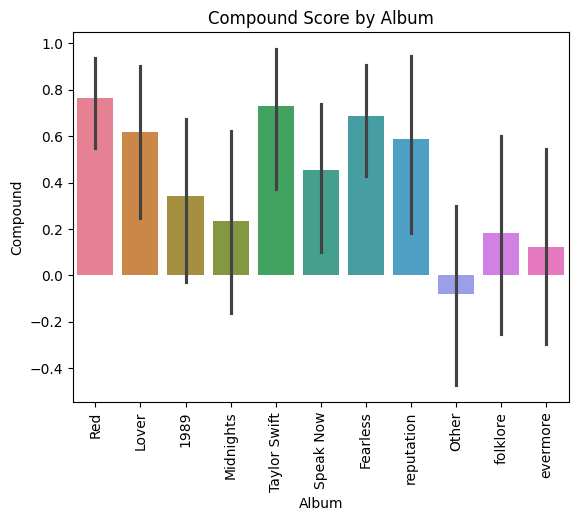

In [11]:
# Graph it
ax = sns.barplot(data=songs, x='Album', y='Compound', hue='Album')
ax.set_title('Compound Score by Album')
plt.xticks(rotation='vertical')
plt.show()

## 5. Sentiment Analysis of just the Chorus

In [12]:
# Map the Lyrics to just the Chorus
# Every Chorus section starts with [Chorus] and ends at the 
# beginning of the next section. You know where the next 
# section starts because it'll say [Bridge] or [Outro] etc.
chorus_sections = []
for lyric in songs["Lyrics"]:
    lyric = str(lyric)
    # empty = ""
    complete_lyric = ""
    while lyric.find("[Chorus]") != -1:
        start = lyric.find("[Chorus]")
        end = lyric.find("[Bridge]")
        section = lyric[start:end].strip()
        complete_lyric += section
        lyrics = lyric[end:]
        
        # lyrics = lyrics[position:]
        # empty += lyrics[0: lyrics.find("[")]
        # lyrics = lyrics[lyrics.find("["):]
        # songs["Lyrics"] = lyrics[0: lyrics.find("[")]
        break
    chorus_sections.append(complete_lyric)

    
    # songs["Lyrics"][i] = complete_lyric
    songs.loc[i, "Lyrics"] = complete_lyric
    






In [13]:
# Return the sentiment score of each review
def get_polarity_scores(review):
    scores = sia.polarity_scores(review)
    return scores["neg"], scores["pos"], scores["neu"], scores["compound"]

# Apply polarity scoring function and save scores into separate columns
songs[['Negative', 'Positive', 'Neutral', 'Compound']] = songs['Lyrics'].apply(lambda x: pd.Series(get_polarity_scores(x)))

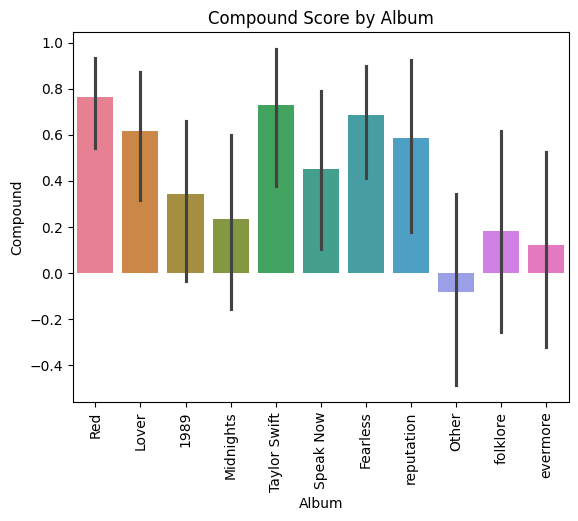

In [14]:
# Graph it
ax = sns.barplot(data=songs, x='Album', y='Compound', hue='Album')
ax.set_title('Compound Score by Album')
plt.xticks(rotation='vertical')
plt.show()